In [1]:
from functions import *

In [2]:
print("PROCESSING PSL DATA AND CONVERTING TO 2D")
X_dimensional = psl["data"]
lat_length = int(psl["lat_length"])
long_length = int(psl["long_length"])
north_atlantic_ocean_psl = psl["original"]
psl_X_dimensional = X_dimensional.rename({"month": "data", "data": "month"}).T
print("______________")
print("PROCESSING SMB DATA AND CONVERTING TO 2D")
smb_X_dimensional = greenland_smb["data"]
smb_longs = greenland_smb["long_pos"]
smb_lats = greenland_smb["lat_pos"]
smb_long_length = int(greenland_smb["long_length"])
smb_lat_length = int(greenland_smb["lat_length"])
smb_processed = greenland_smb["original"]
print("______________")
print("PROCESSING QICE DATA AND CONVERTING TO 2D")
qice_melt_X_dimensional = greenland_qice_melt["data"]
qice_melt_longs = greenland_qice_melt["long_pos"]
qice_melt_lats = greenland_qice_melt["lat_pos"]
qice_melt_long_length = int(greenland_qice_melt["long_length"])
qice_melt_lat_length = int(greenland_qice_melt["lat_length"])
qice_melt_processed = greenland_qice_melt["original"]
print("______________")

PROCESSING PSL DATA AND CONVERTING TO 2D
______________
PROCESSING SMB DATA AND CONVERTING TO 2D
______________
PROCESSING QICE DATA AND CONVERTING TO 2D
______________


______________
performing SVD
standardizing
creating covariance matrix
doing svd
______________
displaying covariance percentage


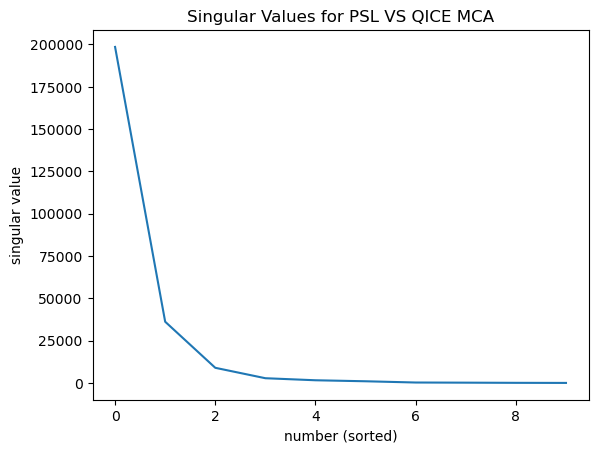

1 covariance explained: 79.35%
2 covariance explained: 14.48%
3 covariance explained: 3.61%
4 covariance explained: 1.15%
______________
graphing time series


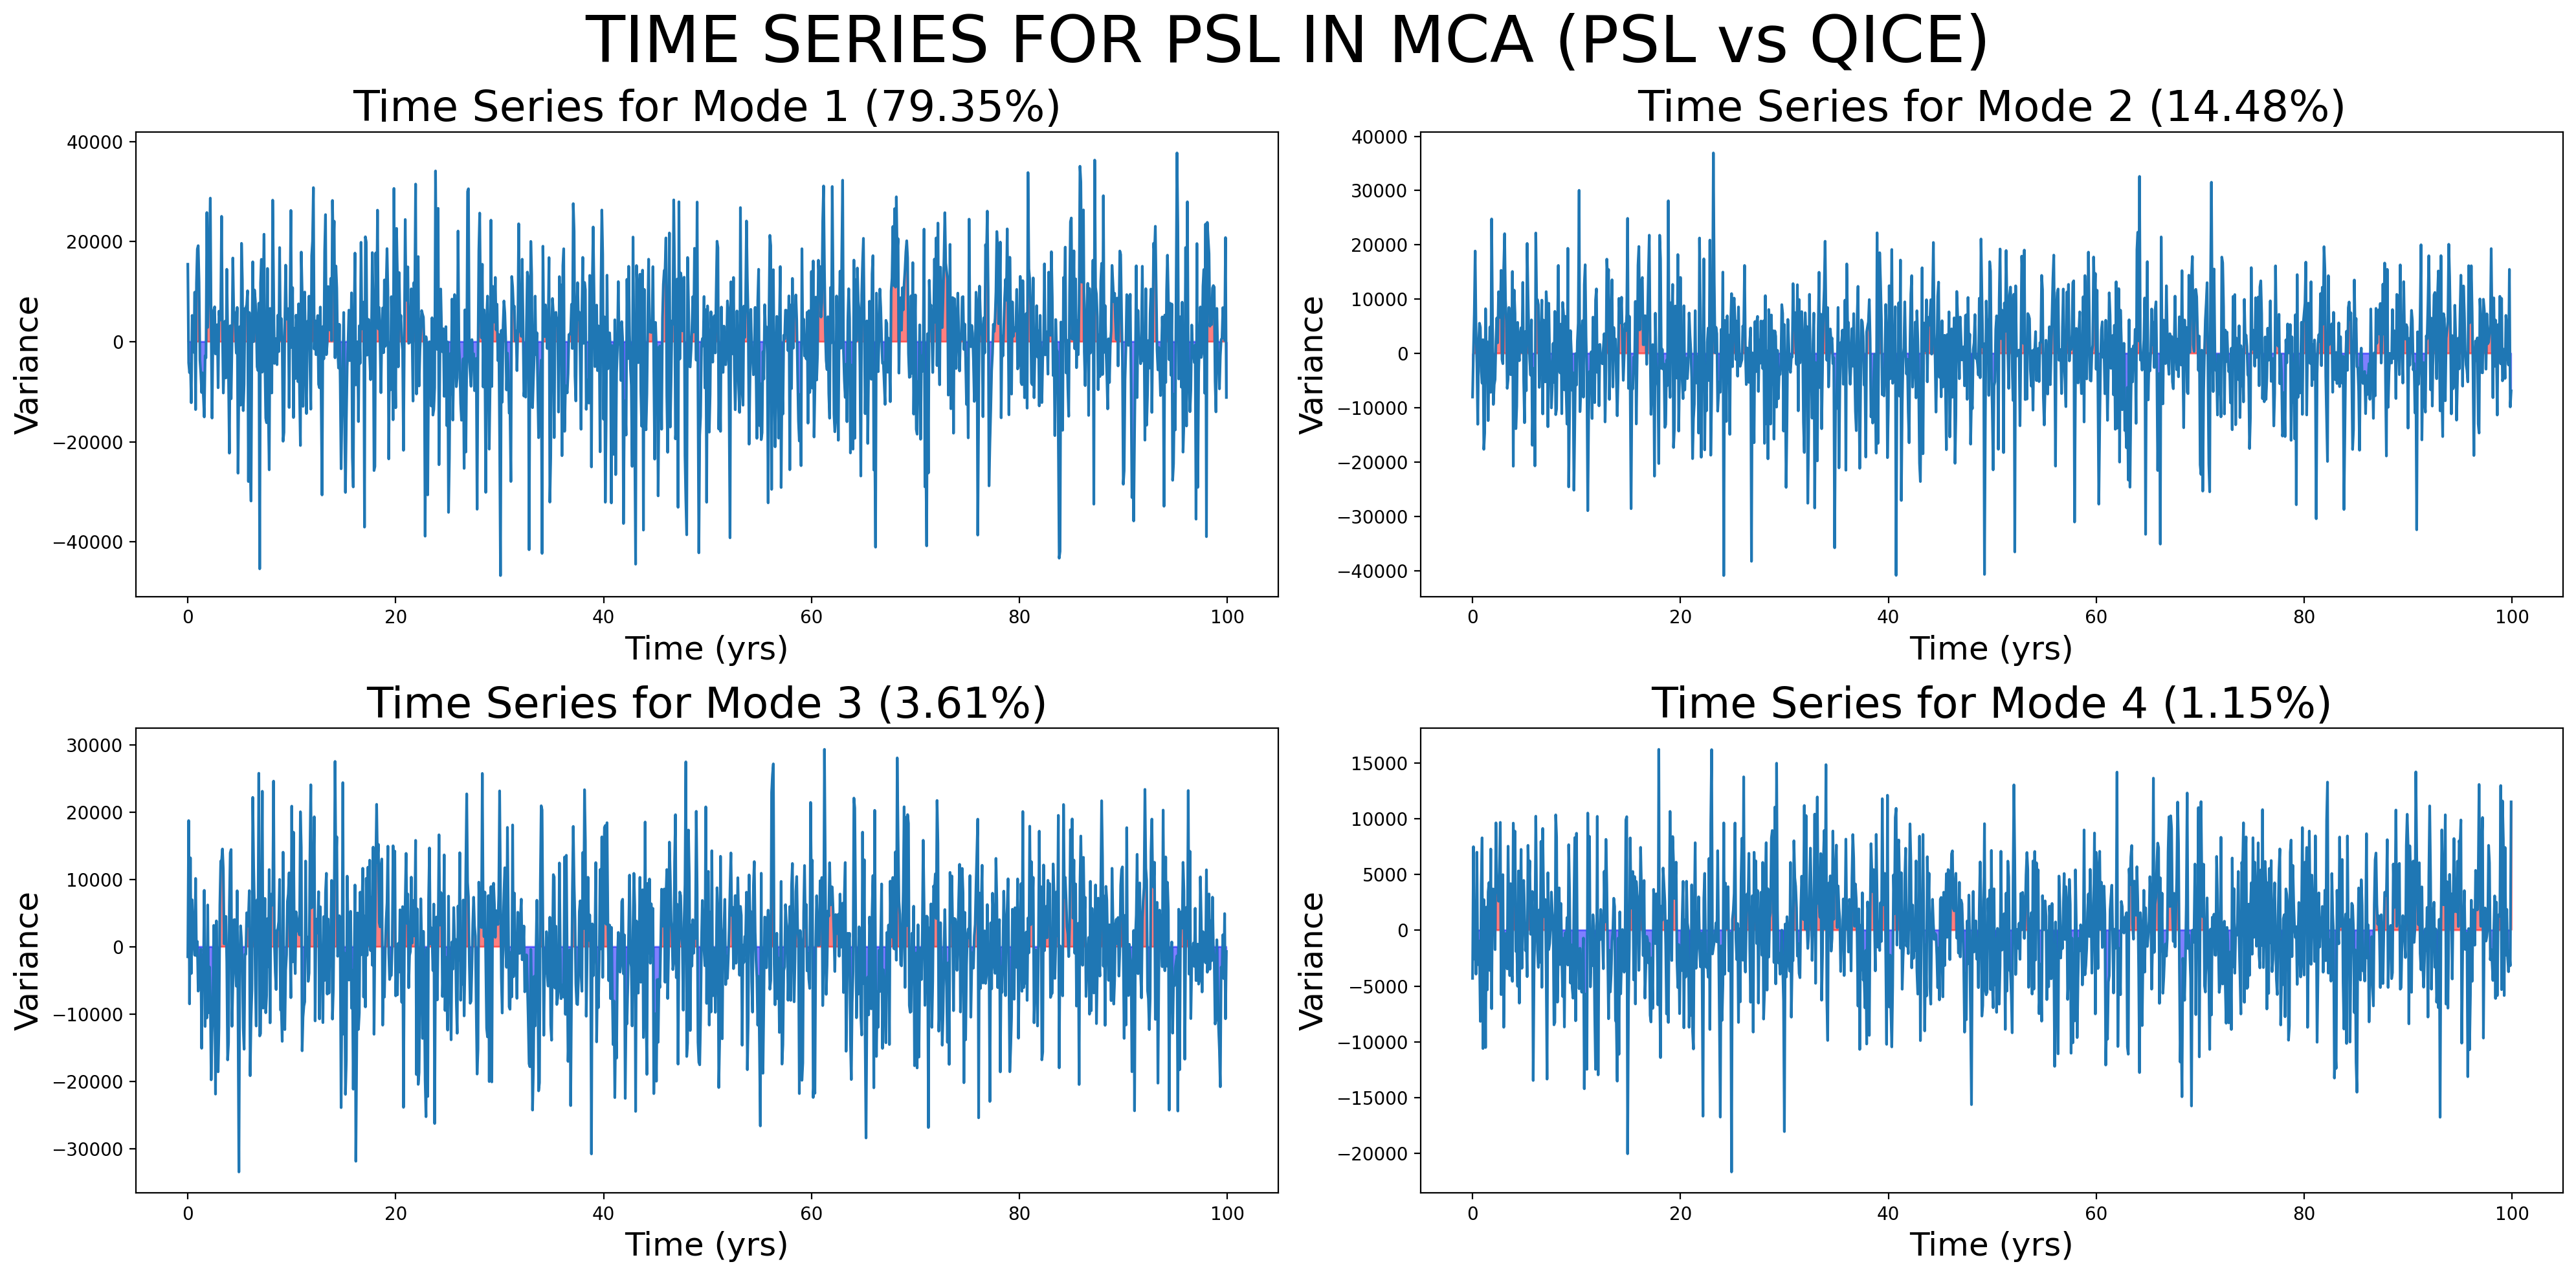

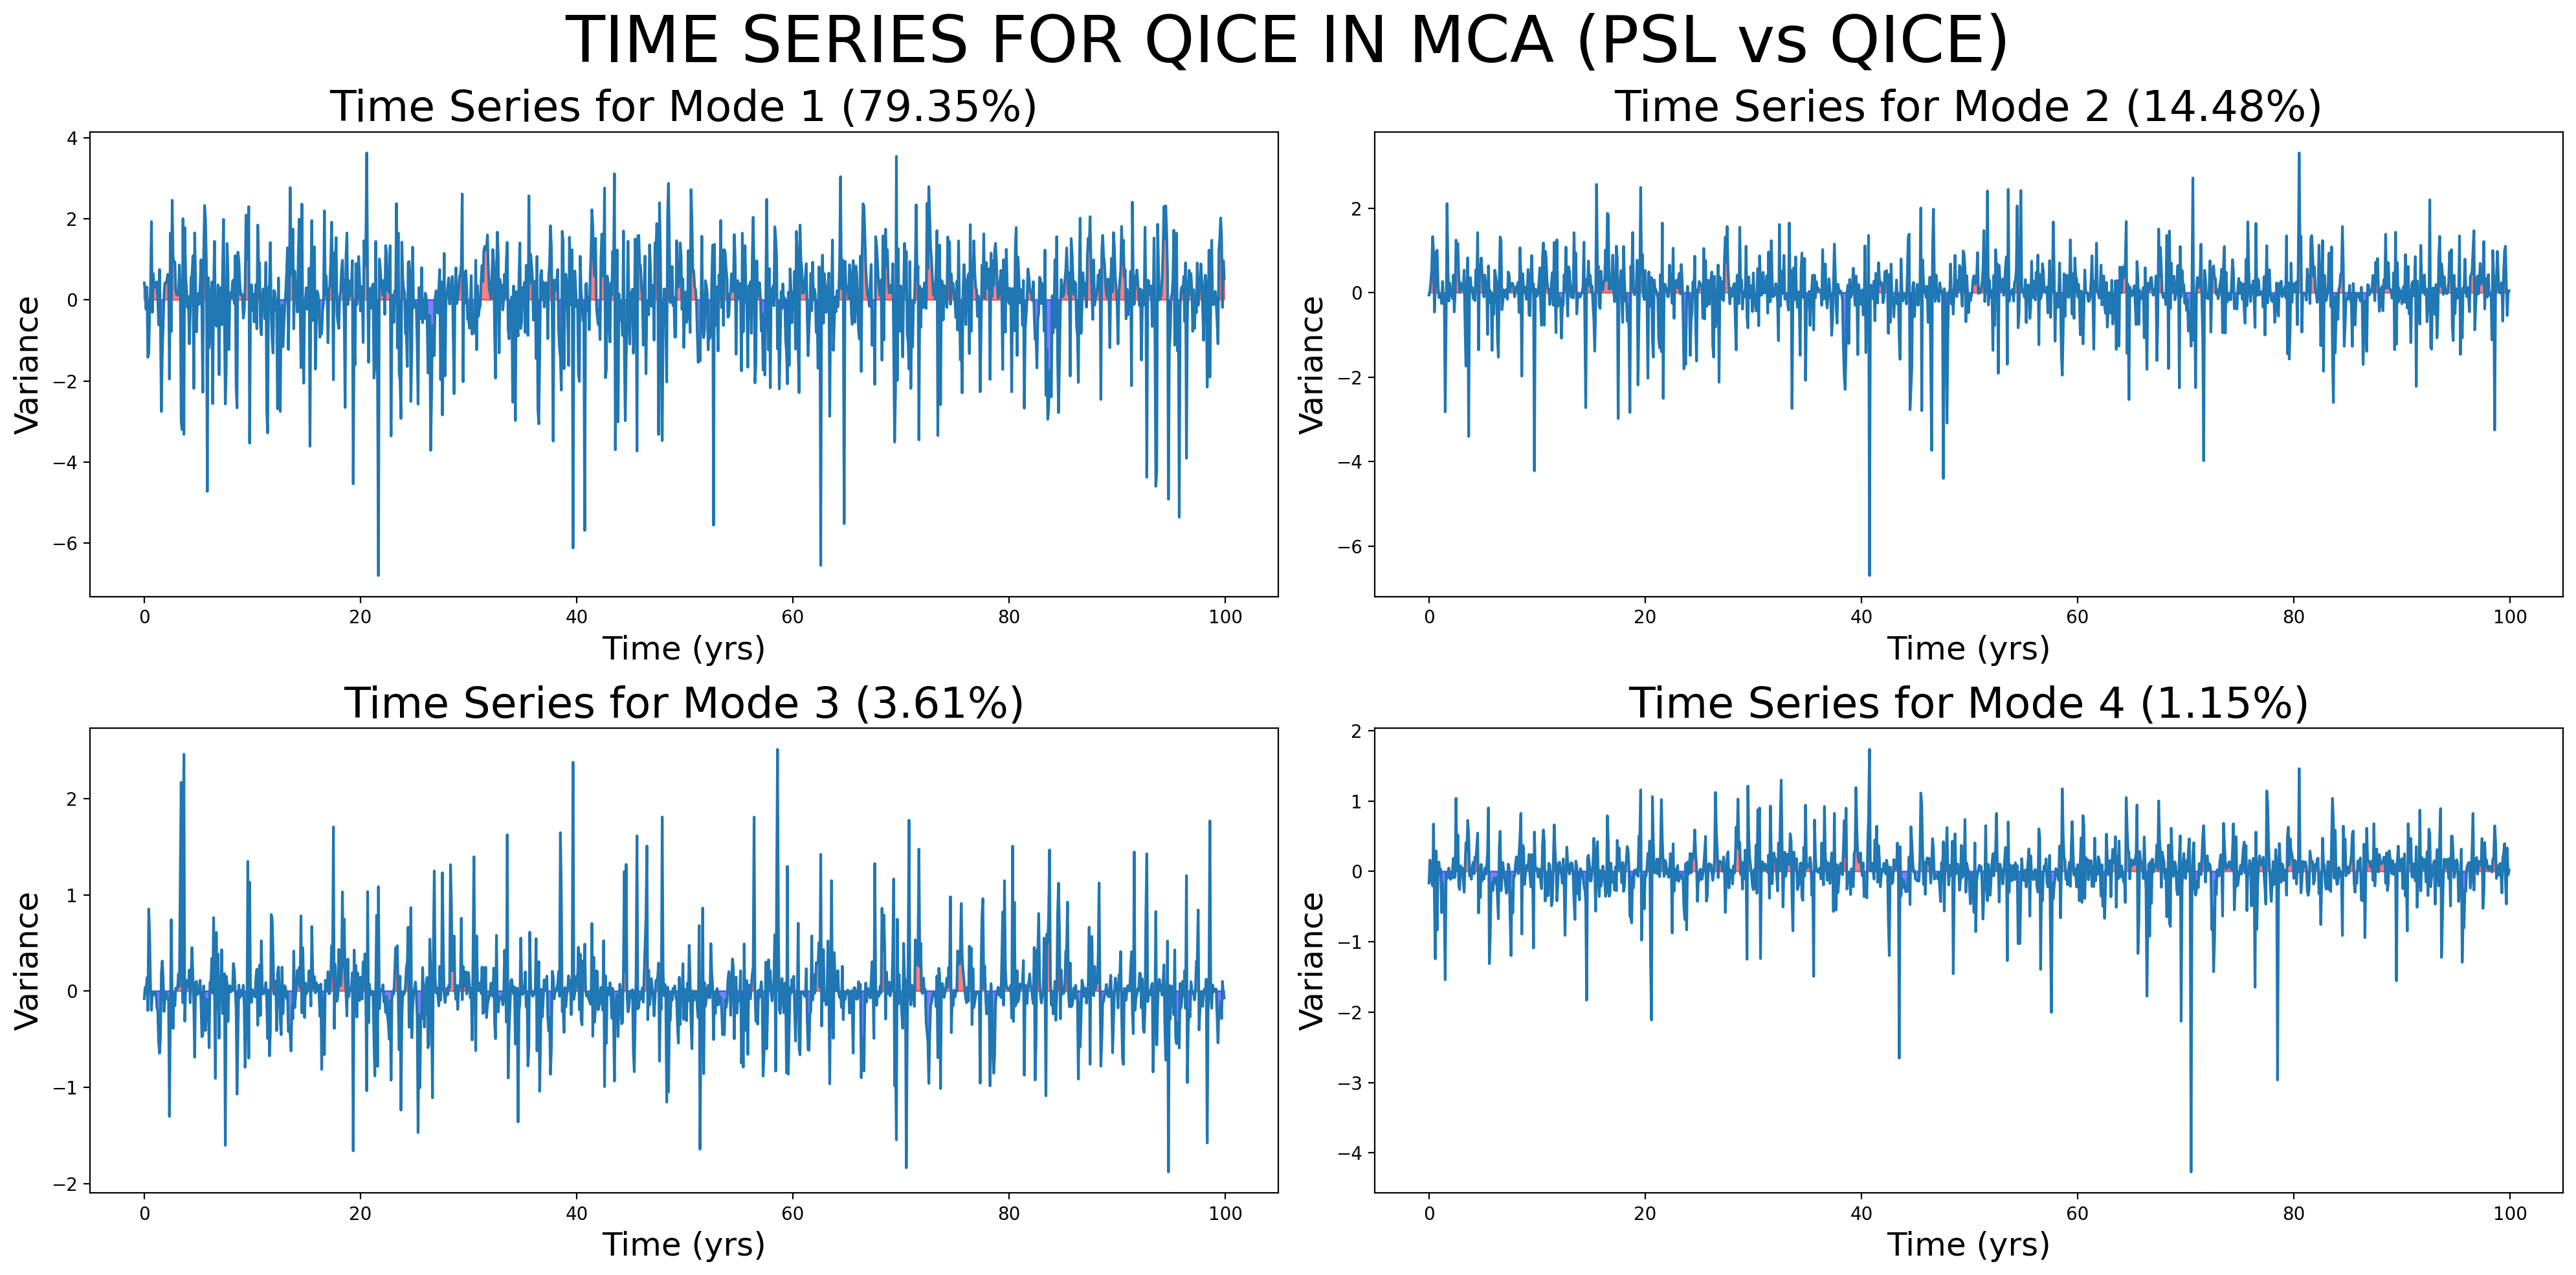

______________
reshaping to 3d
______________
graphing
understood data
made plots
plotting 0
plotting 1
plotting 2
plotting 3
accessorizing


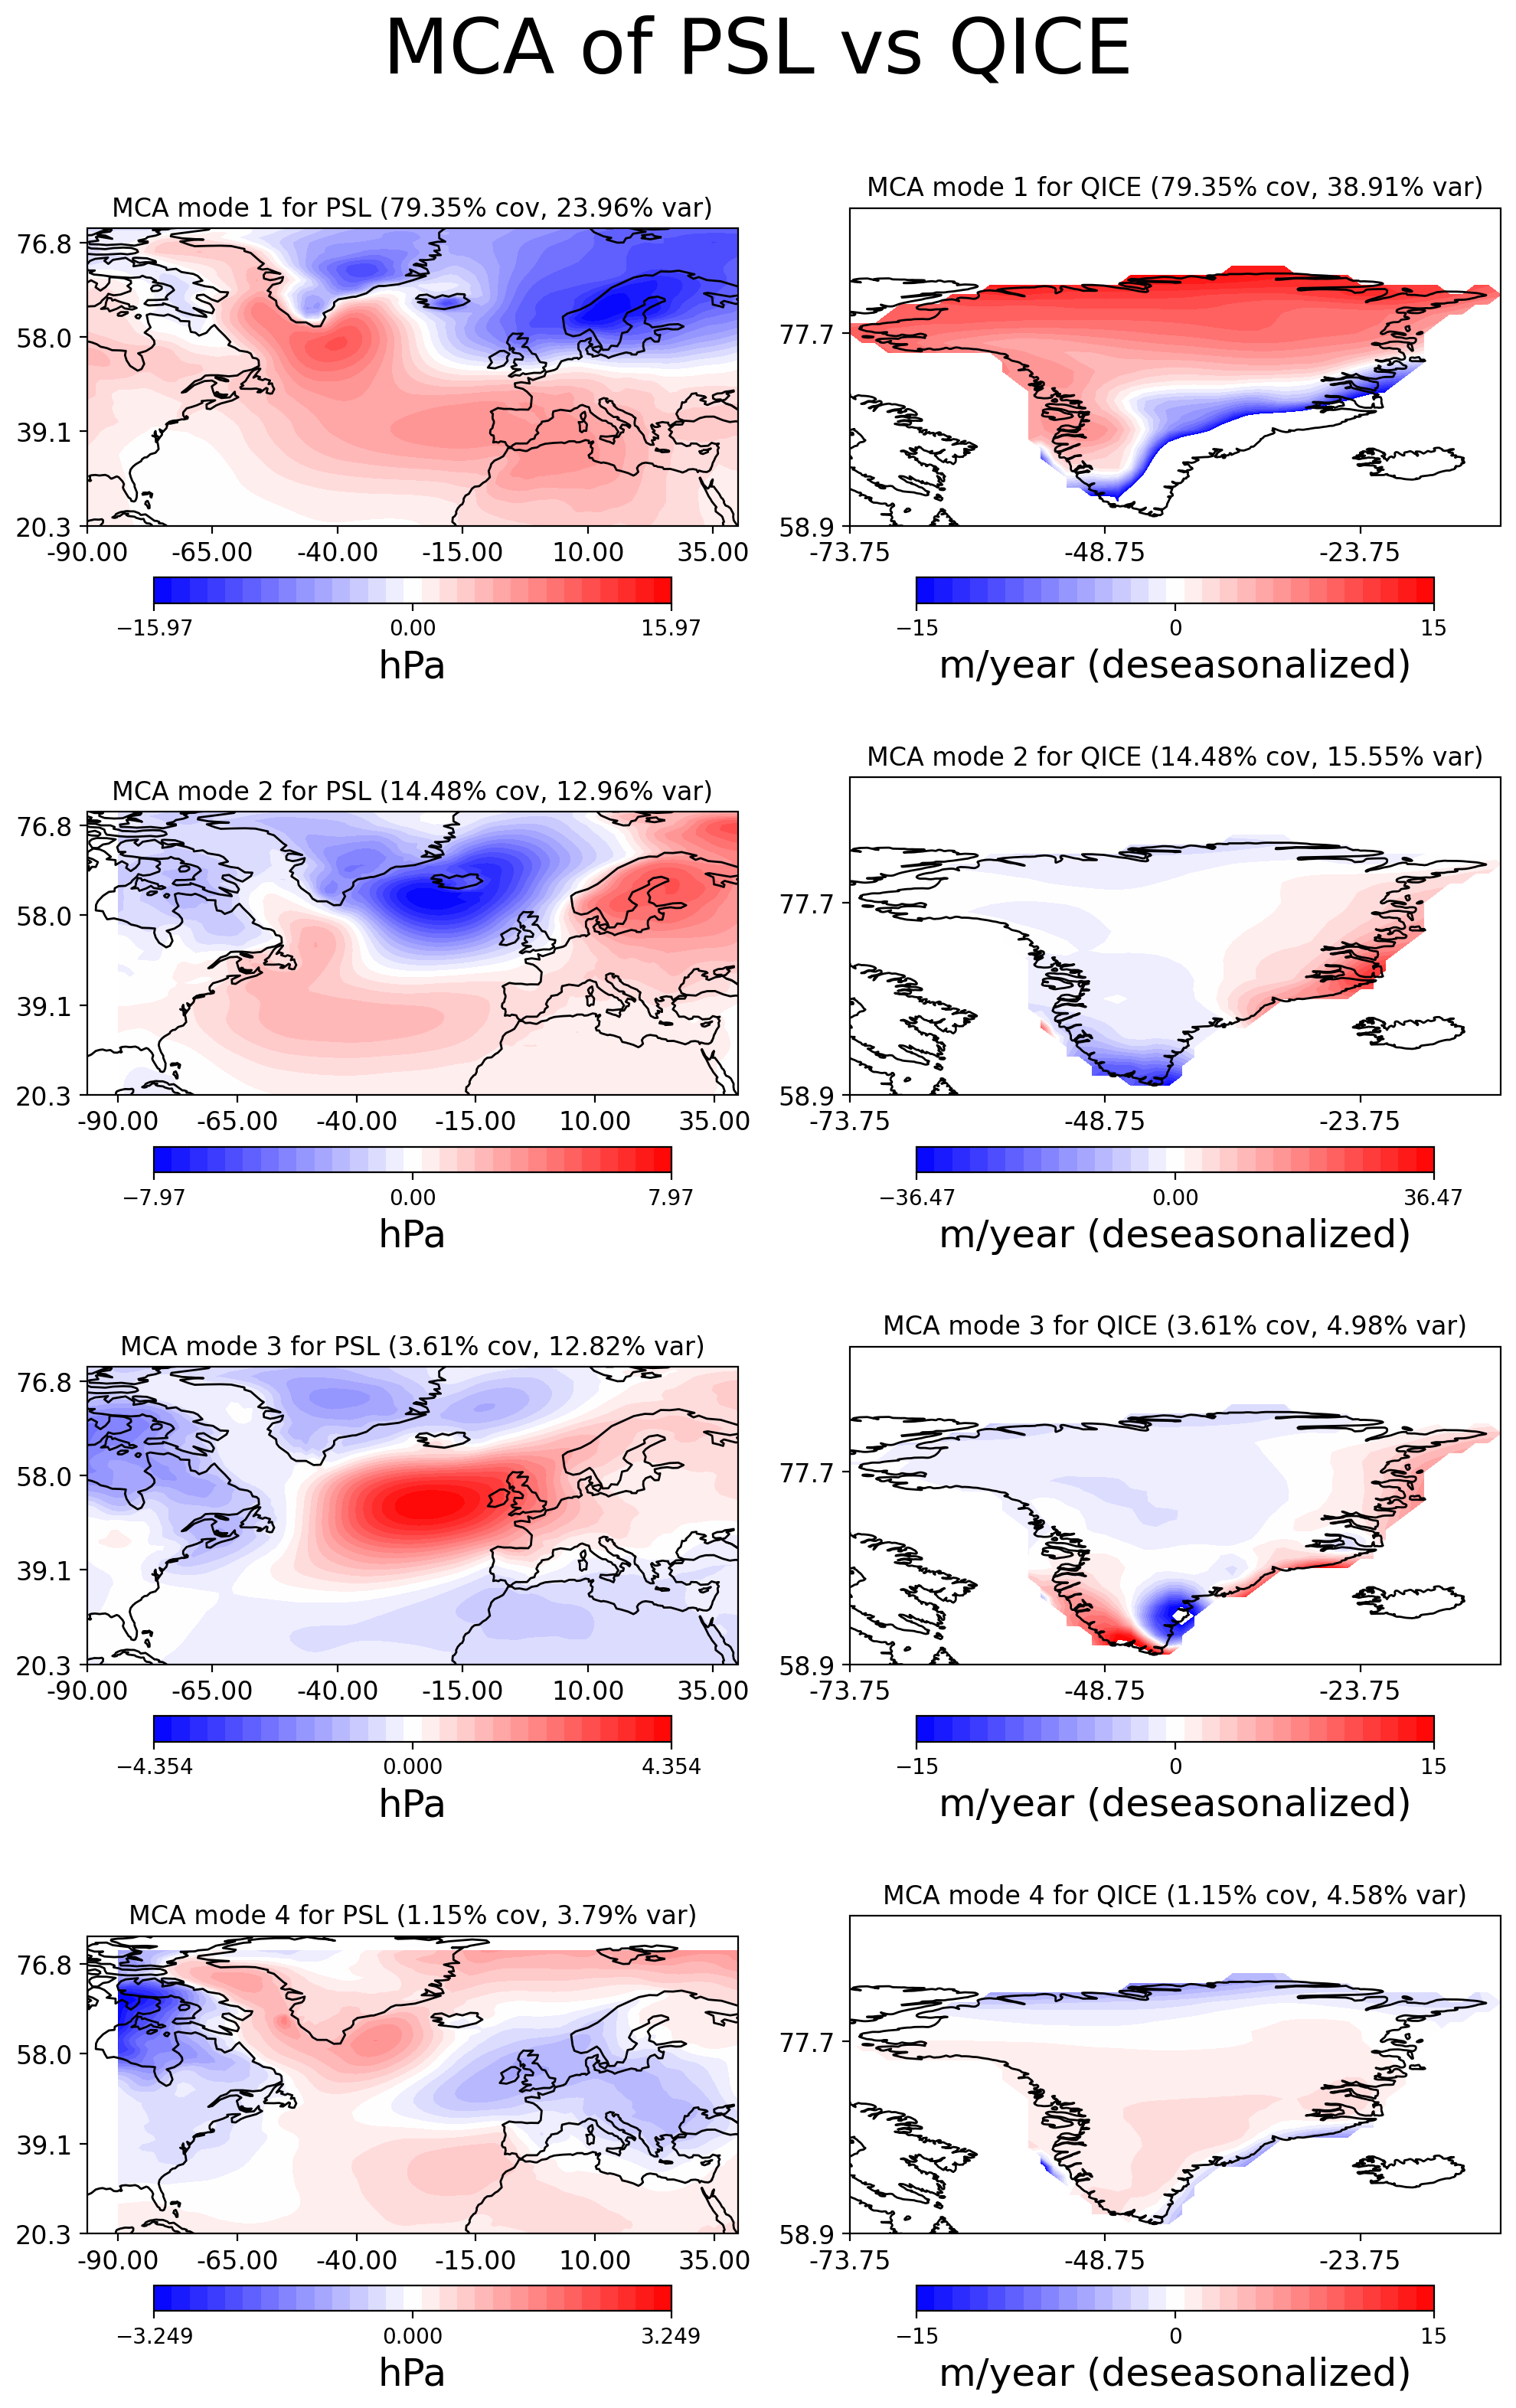

In [3]:
print("______________")
print("performing SVD")
psl_qice_U, psl_qice_S, psl_qice_V_T = svd(psl_X_dimensional, smb_X_dimensional, 10)

print("______________")
print("displaying covariance percentage")
cov_1 = plot_cov(psl_qice_S, "PSL VS QICE")
x_var, y_var = mca_variance_explained(psl_X_dimensional, smb_X_dimensional, psl_qice_U, psl_qice_V_T, 4)

print("______________")
print("graphing time series")
plot_time_series(psl_qice_U, psl_X_dimensional, 4, "TIME SERIES FOR PSL IN MCA (PSL vs QICE)", cov_1)
plot_time_series(psl_qice_V_T.T, smb_X_dimensional, 4, "TIME SERIES FOR QICE IN MCA (PSL vs QICE)", cov_1)

print("______________")
print("reshaping to 3d")
psl_U_reshaped = psl_qice_U.reshape(lat_length,long_length, 10)
smb_V_reshaped = nans_2d_to_3d(psl_qice_V_T.T, smb_long_length, smb_lat_length, smb_longs, smb_lats)

print("______________")
print("graphing")

data_mca1_1 ={
    'reshaped_mca': psl_U_reshaped,
    'original': north_atlantic_ocean_psl,
    'label': "hPa",
    'subtitle': "PSL",
    'shift': 0,
    'sigma':  psl_qice_S,
    'l_override': {}
}

data_mca1_2 ={
    'reshaped_mca': smb_V_reshaped,
    'original': smb_processed,
    'label': "m/year (deseasonalized)",
    'subtitle': "QICE",
    'shift': 360,
    'sigma': psl_qice_S,
    'l_override': {
        0:15,
        2:15,
        3:15
    }

}

plot_mca(data_mca1_1, data_mca1_2, 4, "MCA of PSL vs QICE", cov_1, x_var, y_var)

In [14]:
non_zero_non_nan_values = qice_melt_X_dimensional.where((qice_melt_X_dimensional != 0) & (qice_melt_X_dimensional.notnull()))

# Count the non-zero and non-NaN values
count_non_zero_non_nan = non_zero_non_nan_values.count()
qice_melt_X_dimensional.where((qice_melt_X_dimensional != 0)).count()
print(count_non_zero_non_nan)

<xarray.DataArray 'data' ()> Size: 8B
array(0)


______________
performing SVD
standardizing
creating covariance matrix
doing svd
______________
displaying covariance percentage


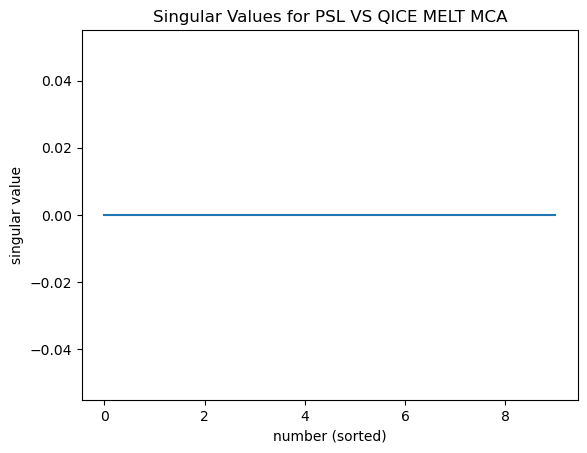

1 covariance explained: nan%
2 covariance explained: nan%
3 covariance explained: nan%
4 covariance explained: nan%


/glade/u/home/mposternack/functions.py:163: RuntimeWarning: invalid value encountered in scalar divide
  ex = np.round(sigmas_melt_squared[i]*100/sum(sigmas_melt_squared), 2)
/glade/u/home/mposternack/functions.py:191: RuntimeWarning: invalid value encountered in divide
  var_k_percents_Y = 100 * (mode_k_variance_Y / total_variance_Y)


______________
graphing time series


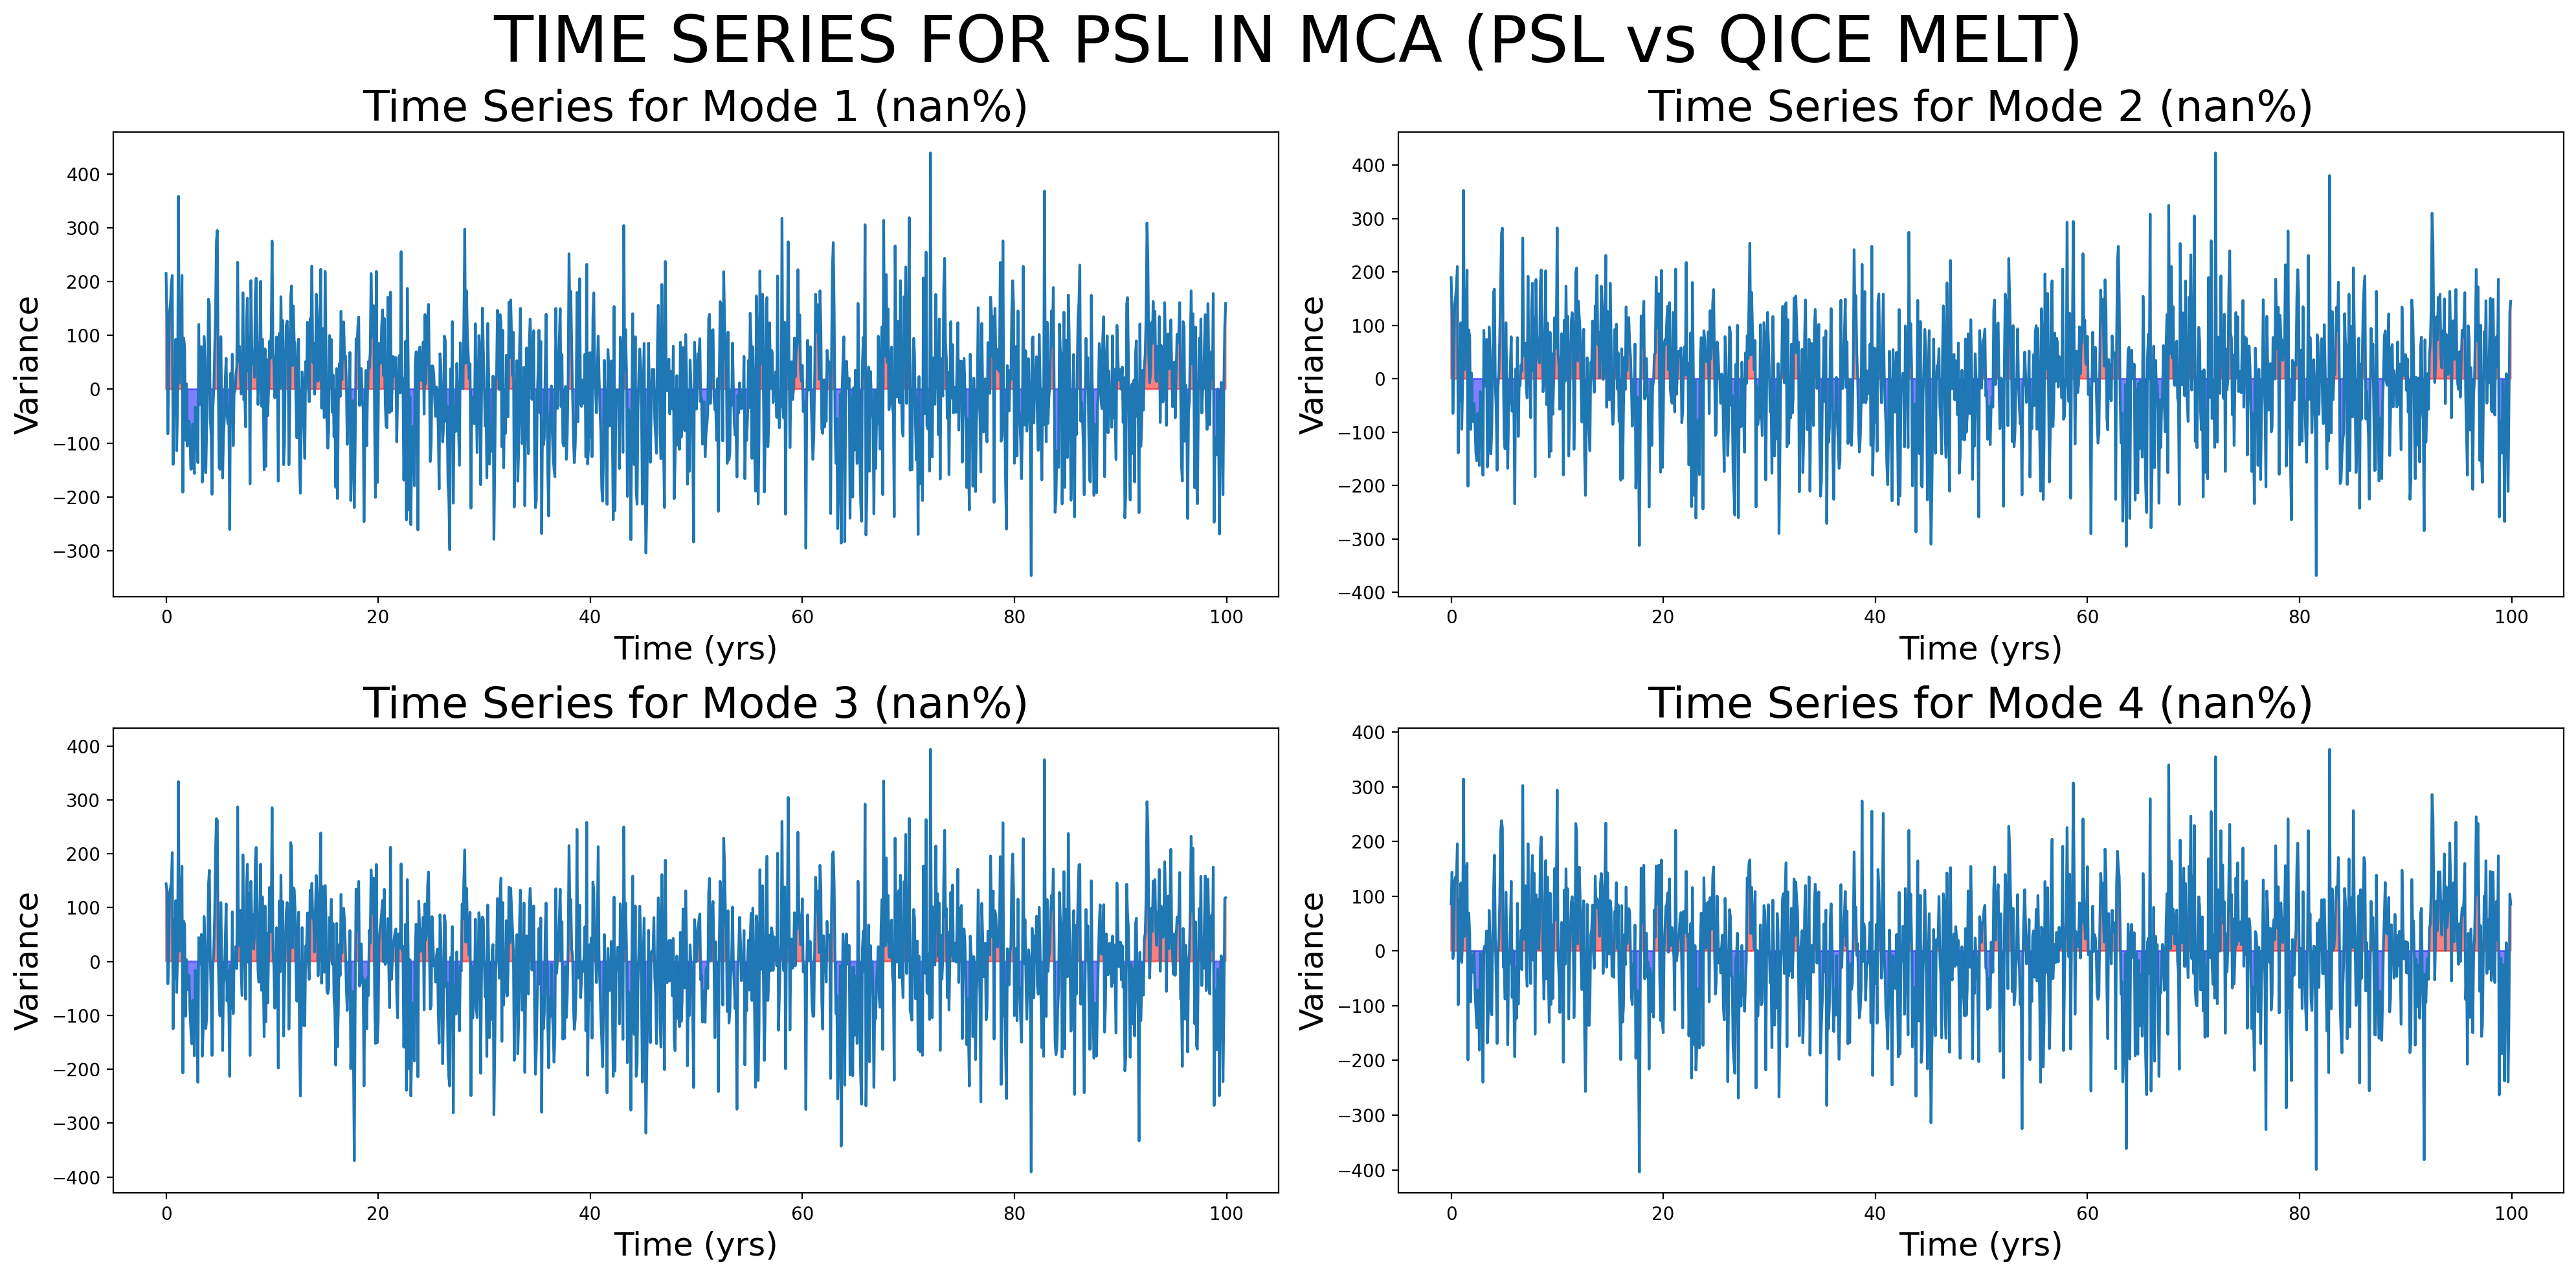

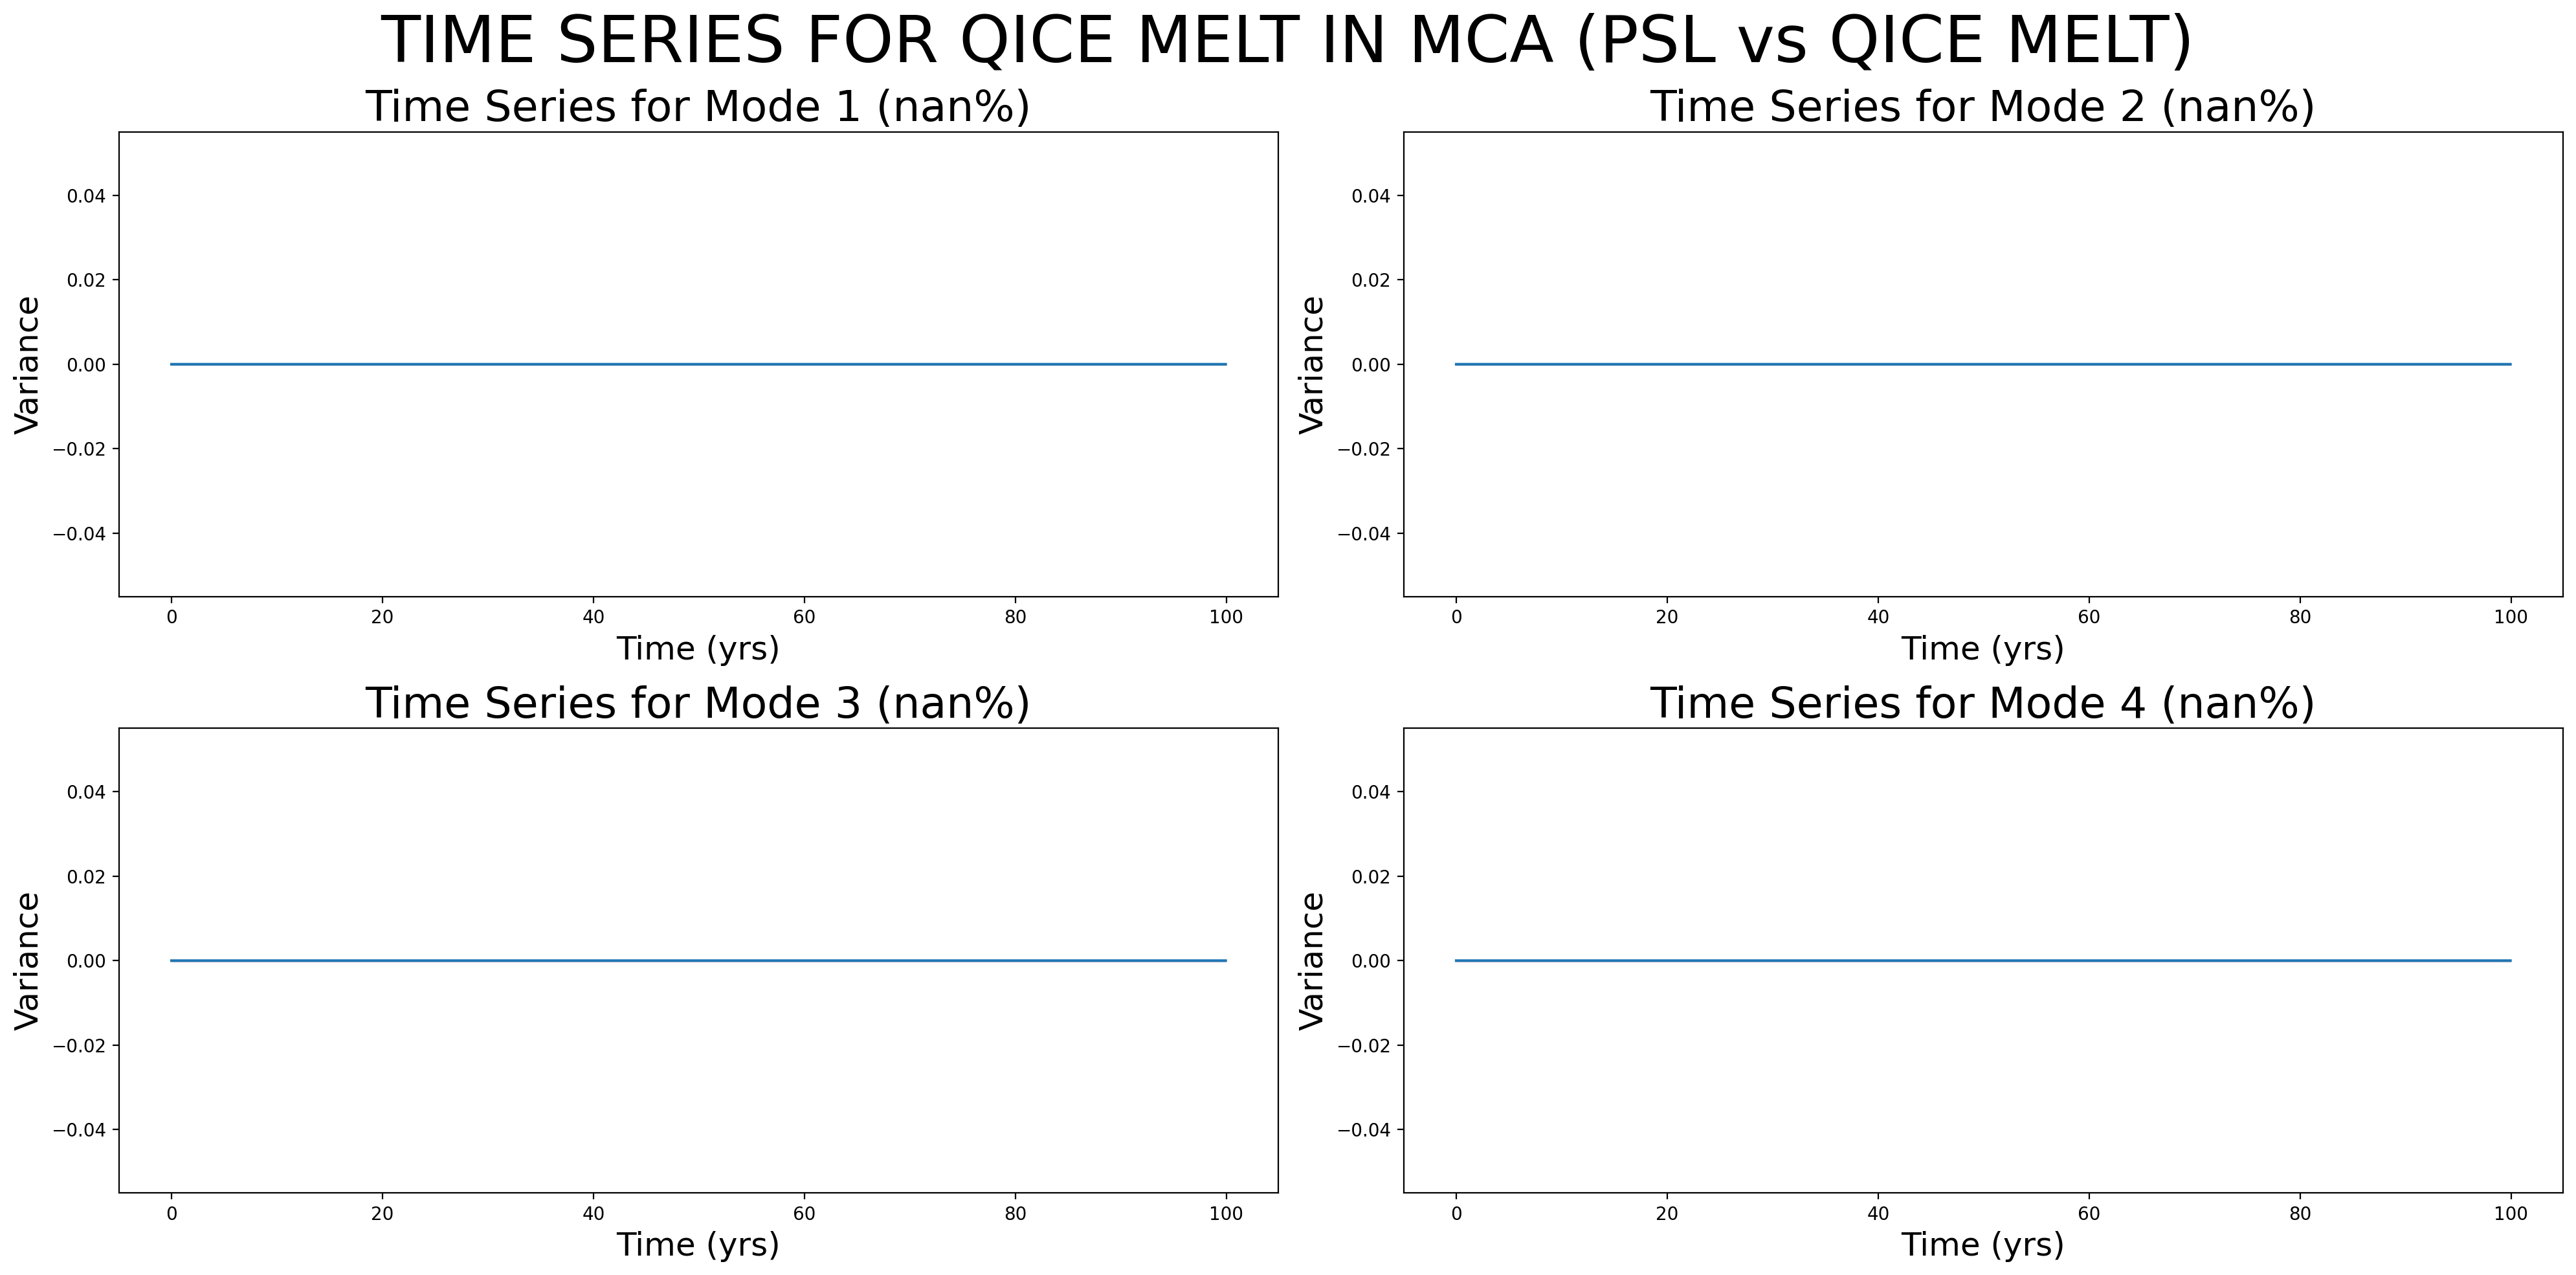

______________
reshaping
______________
graphing
understood data
made plots
plotting 0


ValueError: Contour levels must be increasing

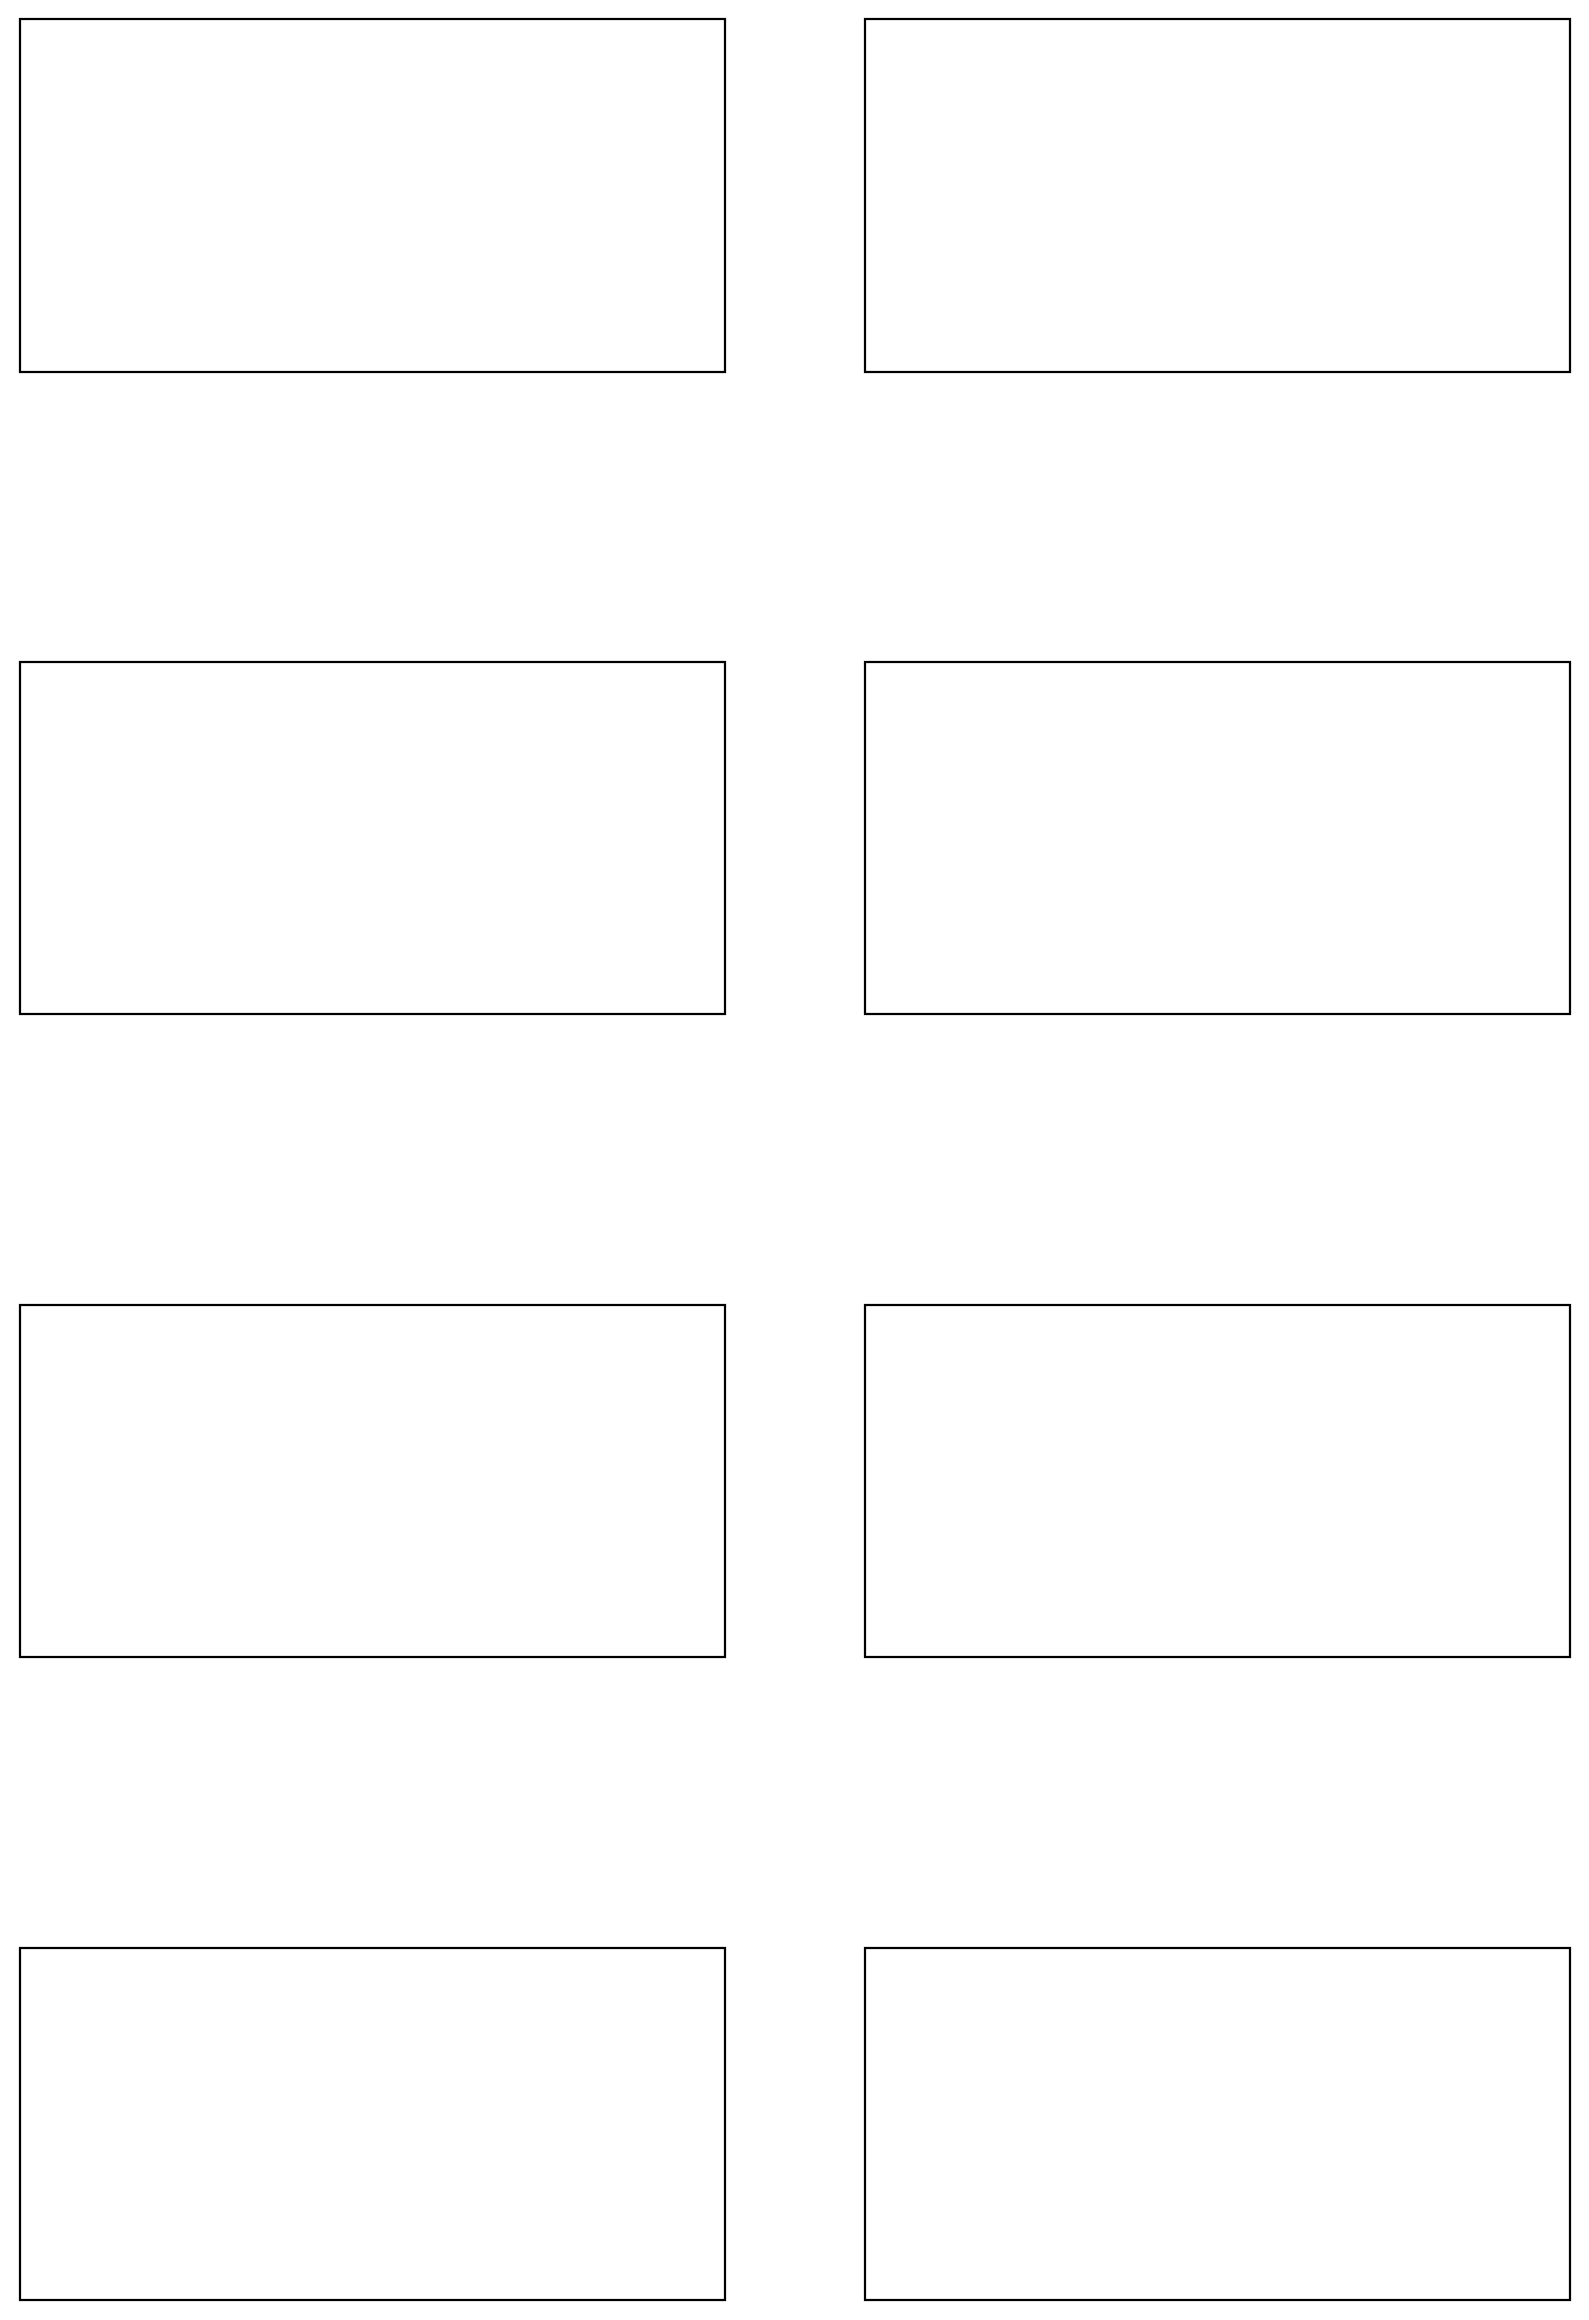

In [4]:
print("______________")
print("performing SVD")
psl_melt_U, psl_melt_S, psl_melt_V_T = svd(psl_X_dimensional, qice_melt_X_dimensional, 10)

print("______________")
print("displaying covariance percentage")
cov_2 =  plot_cov(psl_melt_S, "PSL VS QICE MELT")
x_var_2, y_var_2 = mca_variance_explained(psl_X_dimensional, qice_melt_X_dimensional, psl_melt_U, psl_melt_V_T, 4)


print("______________")
print("graphing time series")
plot_time_series(psl_melt_U, psl_X_dimensional, 4, "TIME SERIES FOR PSL IN MCA (PSL vs QICE MELT)", cov_2)
plot_time_series(psl_melt_V_T.T, qice_melt_X_dimensional, 4, "TIME SERIES FOR QICE MELT IN MCA (PSL vs QICE MELT)", cov_2)

print("______________")
print("reshaping")
psl_melt_U_reshaped = psl_melt_U.reshape(lat_length,long_length, 10)
qice_melt_V_reshaped = nans_2d_to_3d(psl_melt_V_T.T, qice_melt_long_length, qice_melt_lat_length,  qice_melt_longs, qice_melt_lats)

print("______________")
print("graphing")

data_mca2_1 ={
    'reshaped_mca': psl_melt_U_reshaped,
    'original': north_atlantic_ocean_psl,
    'label': "hPa",
    'subtitle': "PSL",
    'shift': 0,
    'sigma':  psl_melt_S,
    'l_override': {}

}

data_mca2_2 ={
    'reshaped_mca': qice_melt_V_reshaped,
    'original': qice_melt_processed,
    'label': "m/year (deseasonalized)",
    'subtitle': "QICE MELT",
    'shift': 360,
    'sigma': psl_melt_S,
    'l_override': {
        0:10,
        2:8,
        3:8
        }
}

plot_mca(data_mca2_1, data_mca2_2, 4, "MCA of PSL vs QICE MELT", cov_2, x_var_2, y_var_2 )
